In [37]:
import pandas as pd

df = pd.read_csv("../data/vehicle_registration_transactions.csv")
df.head()

,Transaction Month and Year,Make,Model,Model Year,Vehicle Color,Vehicle Type,Vehicle Primary Use,Fuel Type Primary,Fuel Type Secondary,Gross Vehicle Weight Rating Class,...,Plate Background,Plate Configuration,Owner Type,County,State,Postal Code,Transaction Type,Transaction Channel,2020 GEOID,Transaction Count
0,01/01/2020,ACURA,CL,1999,WHITE,PASSENGER CAR,Passenger,Gasoline,NaN,1C,...,Standard Plate,Standard,Individual Owner,King,WA,98117,Registration Renewal,Online,5.303300e+10,1
1,01/01/2020,ACURA,ILX,2013,GRAY,PASSENGER CAR,Passenger,Gasoline,NaN,1B,...,Standard Plate,Standard,Individual Owner,Spokane,WA,99223,Registration Renewal,Online,5.306300e+10,1
2,01/01/2020,ACURA,ILX,2017,BLACK,PASSENGER CAR,Passenger,Gasoline,NaN,1C,...,Standard Plate,Standard,Individual Owner,King,WA,98136,Registration Renewal,Online,5.303301e+10,1
3,01/01/2020,ACURA,ILX,2018,NaN,PASSENGER CAR,Passenger,Gasoline,NaN,1C,...,Standard Plate,Standard,Individual Owner,King,WA,98136,Registration Renewal,Online,5.303301e+10,1
4,01/01/2020,ACURA,ILX,2019,NaN,PASSENGER CAR,Passenger,Gasoline,NaN,1C,...,Standard Plate,Standard,Individual Owner,Thurston,WA,98506,Registration Renewal,Online,5.306701e+10,1


In [38]:
cols_to_remove = [
    'Vehicle Color', 'Fuel Type Secondary', 'Gross Vehicle Weight Rating Class', 
    'Gross Vehicle Weight Rating Range (lbs)', '2020 GEOID'
]

# Removing the specified columns
df.drop(columns=cols_to_remove, inplace=True)

# Let's print the modified DataFrame columns after removal
print("\nModified DataFrame columns:")
print(df.columns)



Modified DataFrame columns:
Index(['Transaction Month and Year', 'Make', 'Model', 'Model Year',
       'Vehicle Type', 'Vehicle Primary Use', 'Fuel Type Primary',
       'Electrification Level', 'Plate Background', 'Plate Configuration',
       'Owner Type', 'County', 'State', 'Postal Code', 'Transaction Type',
       'Transaction Channel', 'Transaction Count'],
      dtype='object')


In [39]:
df.columns.to_list()

['Transaction Month and Year',
 'Make',
 'Model',
 'Model Year',
 'Vehicle Type',
 'Vehicle Primary Use',
 'Fuel Type Primary',
 'Electrification Level',
 'Plate Background',
 'Plate Configuration',
 'Owner Type',
 'County',
 'State',
 'Postal Code',
 'Transaction Type',
 'Transaction Channel',
 'Transaction Count']

In [8]:
df['Electrification Level'].value_counts()

ICE (Internal Combustion Engine)                 25665548
Strong HEV (Hybrid Electric Vehicle)               598271
HEV (Hybrid Electric Vehicle) - Level Unknown      437002
BEV (Battery Electric Vehicle)                     361963
PHEV (Plug-in Hybrid Electric Vehicle)             111018
Mild HEV (Hybrid Electric Vehicle)                  28602
Non-Powered                                            19
Name: Electrification Level, dtype: int64

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

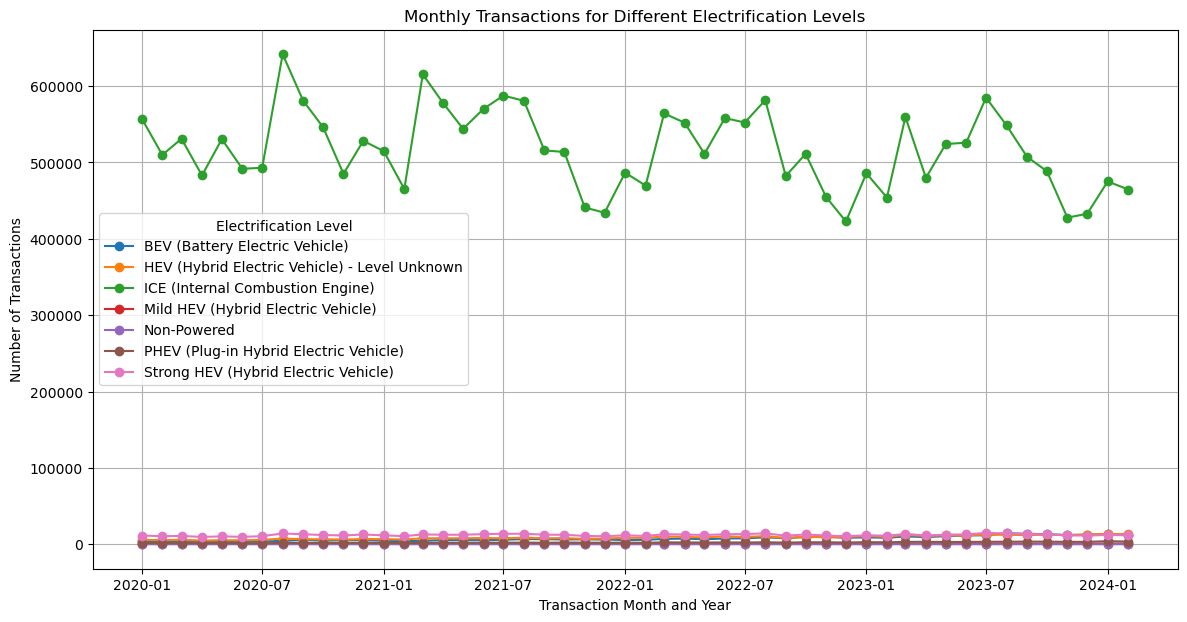

In [11]:
df['Transaction Month and Year'] = pd.to_datetime(df['Transaction Month and Year'])

# Pivot the data to get sums of transactions for each Electrification Level per month
pivoted_data = df.pivot_table(values='Transaction Count', index='Transaction Month and Year', columns='Electrification Level', aggfunc='sum', fill_value=0)

# Plot a line chart
plt.figure(figsize=(14, 7))

# Plot each electrification level as a separate line
for level in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[level], marker='o', label=level)

plt.title('Monthly Transactions for Different Electrification Levels')
plt.xlabel('Transaction Month and Year')
plt.ylabel('Number of Transactions')
plt.legend(title='Electrification Level')
plt.grid(True)
plt.show()


/var/folders/jg/btc6sbzd06jdfdnzwvcdpcbm0000gn/T/ipykernel_38169/1025204021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transaction Month and Year'] = pd.to_datetime(df_filtered['Transaction Month and Year'])


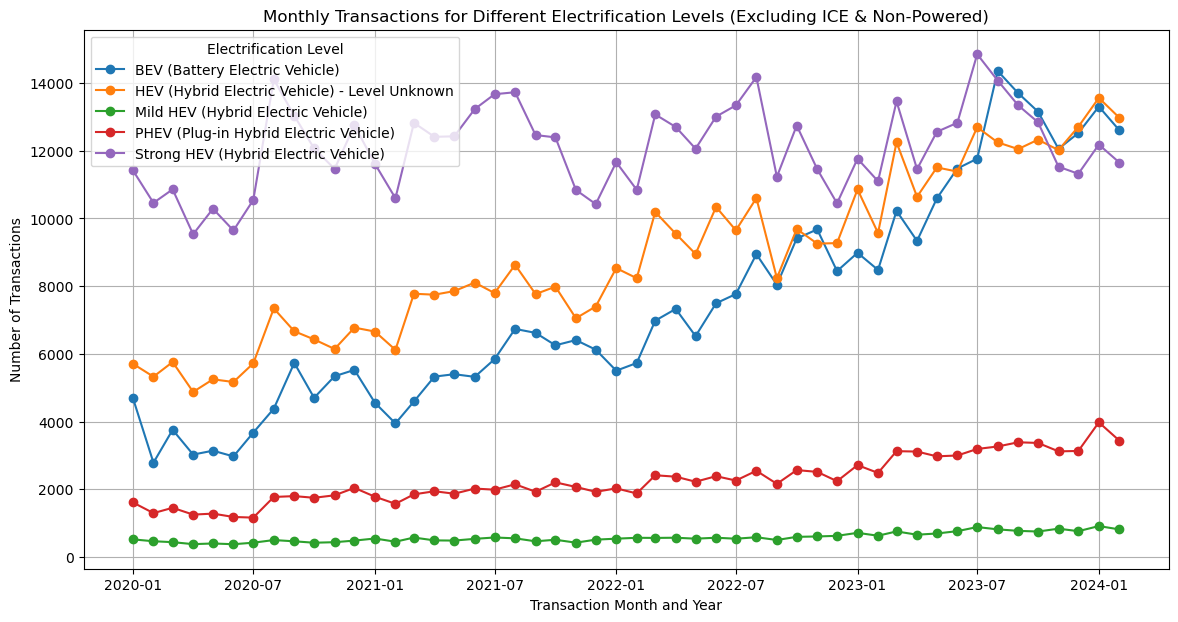

In [14]:
# Assuming `df` is your DataFrame after loading the data.
# Filter out rows with 'ICE (Internal Combustion Engine)' and 'Non-Powered'
df_filtered = df[~df['Electrification Level'].isin(['ICE (Internal Combustion Engine)', 'Non-Powered'])]

# Convert 'Transaction Month and Year' to datetime if it's not already
df_filtered['Transaction Month and Year'] = pd.to_datetime(df_filtered['Transaction Month and Year'])

# Pivot the data to get sums of transactions for each Electrification Level per month
pivoted_data = df_filtered.pivot_table(values='Transaction Count', index='Transaction Month and Year', columns='Electrification Level', aggfunc='sum', fill_value=0)

# Plot a line chart
plt.figure(figsize=(14, 7))

for column in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[column], marker='o', label=column)

plt.title('Monthly Transactions for Different Electrification Levels (Excluding ICE & Non-Powered)')
plt.xlabel('Transaction Month and Year')
plt.ylabel('Number of Transactions')
plt.legend(title='Electrification Level')
plt.grid(True)
plt.show()


/var/folders/jg/btc6sbzd06jdfdnzwvcdpcbm0000gn/T/ipykernel_38169/1783567778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Transaction Month and Year'] = pd.to_datetime(df_filtered['Transaction Month and Year'])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.83172D+00    |proj g|=  3.69205D+01


 This problem is unconstrained.



At iterate    5    f= -1.89036D+00    |proj g|=  5.31536D-01

At iterate   10    f= -1.91935D+00    |proj g|=  1.11216D+01

At iterate   15    f= -1.97880D+00    |proj g|=  5.21311D-02

At iterate   20    f= -1.97881D+00    |proj g|=  7.33575D-02

At iterate   25    f= -1.98048D+00    |proj g|=  1.56199D+00

At iterate   30    f= -1.98117D+00    |proj g|=  6.58580D-01

At iterate   35    f= -2.01583D+00    |proj g|=  5.09869D+00

At iterate   40    f= -2.01932D+00    |proj g|=  1.77322D-01

At iterate   45    f= -2.01933D+00    |proj g|=  1.97510D-01


/Users/a123/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -2.01937D+00    |proj g|=  4.27132D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     95      1     0     0   4.271D-01  -2.019D+00
  F =  -2.0193701212321353     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


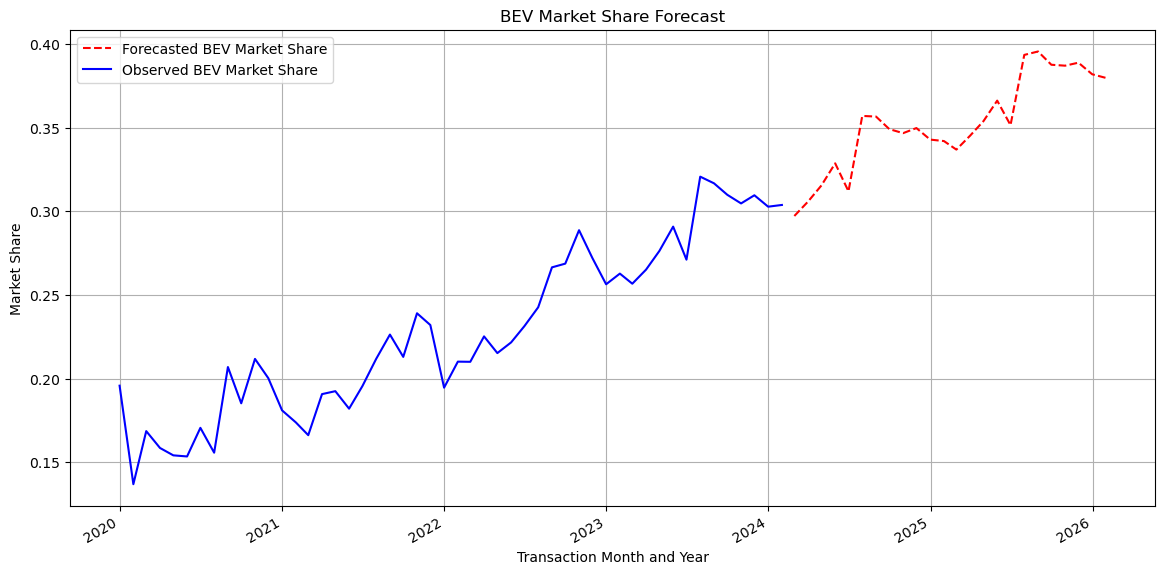

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df_filtered['Transaction Month and Year'] = pd.to_datetime(df_filtered['Transaction Month and Year'])

# Pivot the data to get sums of transactions for each Electrification Level per month
pivoted_data = df_filtered.pivot_table(values='Transaction Count', 
                              index='Transaction Month and Year', 
                              columns='Electrification Level', 
                              aggfunc='sum', 
                              fill_value=0).asfreq('MS')

# Calculate the total electric vehicle sales
pivoted_data['Total EV Sales'] = pivoted_data.sum(axis=1)

# Calculate the market share for BEV (Battery Electric Vehicle)
pivoted_data['BEV Market Share'] = pivoted_data['BEV (Battery Electric Vehicle)'] / pivoted_data['Total EV Sales']

# Define the time series for the market share
bev_market_share_ts = pivoted_data['BEV Market Share'].fillna(method='ffill')

# Fit the SARIMA model
sarima_model = SARIMAX(bev_market_share_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Forecast the next 12 months
bev_forecast = sarima_results.get_forecast(steps=24)
forecast_index = pd.date_range(start=bev_market_share_ts.index[-1] + pd.offsets.MonthEnd(1), periods=24, freq='M')
bev_forecast_values = bev_forecast.predicted_mean

# Plot observed and forecasted BEV market share
plt.figure(figsize=(14, 7))
plt.plot(forecast_index, bev_forecast_values, label='Forecasted BEV Market Share', linestyle='--', color='red')
bev_market_share_ts.plot(label='Observed BEV Market Share', color='blue')
plt.grid()
plt.title('BEV Market Share Forecast')
plt.xlabel('Transaction Month and Year')
plt.ylabel('Market Share')
plt.legend()
plt.show()

总体来说，模型预测BEV在市场中的普及率正在增加。

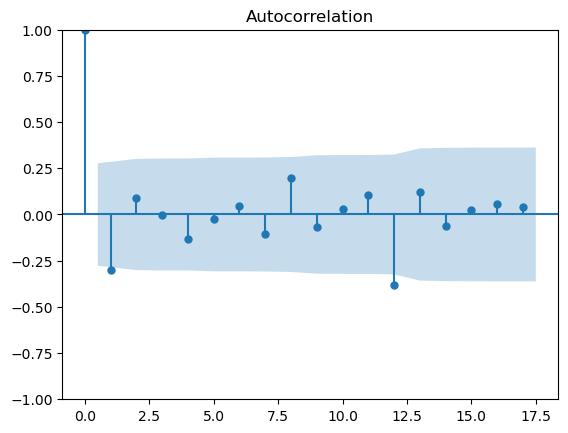

Jarque-Bera test statistic: 387.375789579024, p-value: 7.628094795604046e-85
MSE: 0.0014276209676406825, RMSE: 0.037783871792613874


In [58]:
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import jarque_bera
import numpy as np

# get residual
residuals = sarima_results.resid

# ACF plot
plot_acf(residuals)
plt.show()

# Jarque-Bera test
jb_test = jarque_bera(residuals)
print(f'Jarque-Bera test statistic: {jb_test[0]}, p-value: {jb_test[1]}')

# MSE, RMSE
mse = (residuals**2).mean()
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')


从图中看出，除了时间滞后0（总是1，因为是序列与其自身的相关）之外，其他滞后的自相关值大多在蓝色置信区间内，这通常表示没有显著的自相关性。这是一个好迹象，说明模型已经捕捉到了大部分信息，残差接近白噪声。

Jarque-Bera测试用于检验数据是否有正态分布的特征。在这里，测试统计量很高，p值接近0，远远小于任何常见的显著性水平（例如0.05或0.01），这表明残差分布与正态分布显著不同。

均方误差（MSE）和均方根误差（RMSE）都是衡量预测误差的指标。在这里，MSE和RMSE的值都非常小，表明模型的预测值与实际观测值相差不大，说明模型的预测精度较高。

In [61]:
tesla_df = df_filtered[df_filtered['Make'] == 'TESLA']


total_ev_sales = df_filtered.groupby('Transaction Month and Year')['Transaction Count'].sum()
tesla_sales = tesla_df.groupby('Transaction Month and Year')['Transaction Count'].sum()
tesla_market_share = tesla_sales / total_ev_sales

# get telsa time series data
tesla_market_share_ts = tesla_market_share.asfreq('MS')

# use SARIMA model to predict
model = SARIMAX(tesla_market_share_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# 进行预测
forecast = results.get_forecast(steps=24)  # 

# check forcasted result
forecast.predicted_mean

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.95561D+00    |proj g|=  1.27546D+01


 This problem is unconstrained.



At iterate    5    f= -1.96581D+00    |proj g|=  8.29855D-01

At iterate   10    f= -1.98703D+00    |proj g|=  1.17692D+01

At iterate   15    f= -2.01541D+00    |proj g|=  5.05830D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/a123/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     67      2     0     0   1.014D-02  -2.015D+00
  F =  -2.0154099518842359     

ABNORMAL_TERMINATION_IN_LNSRCH                              


2024-03-01    0.166458
2024-04-01    0.175006
2024-05-01    0.185589
2024-06-01    0.199963
2024-07-01    0.169530
2024-08-01    0.220666
2024-09-01    0.213161
2024-10-01    0.203481
2024-11-01    0.193244
2024-12-01    0.198602
2025-01-01    0.189857
2025-02-01    0.197886
2025-03-01    0.189079
2025-04-01    0.197613
2025-05-01    0.208289
2025-06-01    0.222753
2025-07-01    0.192052
2025-08-01    0.243451
2025-09-01    0.235785
2025-10-01    0.226013
2025-11-01    0.215594
2025-12-01    0.221116
2026-01-01    0.212496
2026-02-01    0.220516
Freq: MS, Name: predicted_mean, dtype: float64

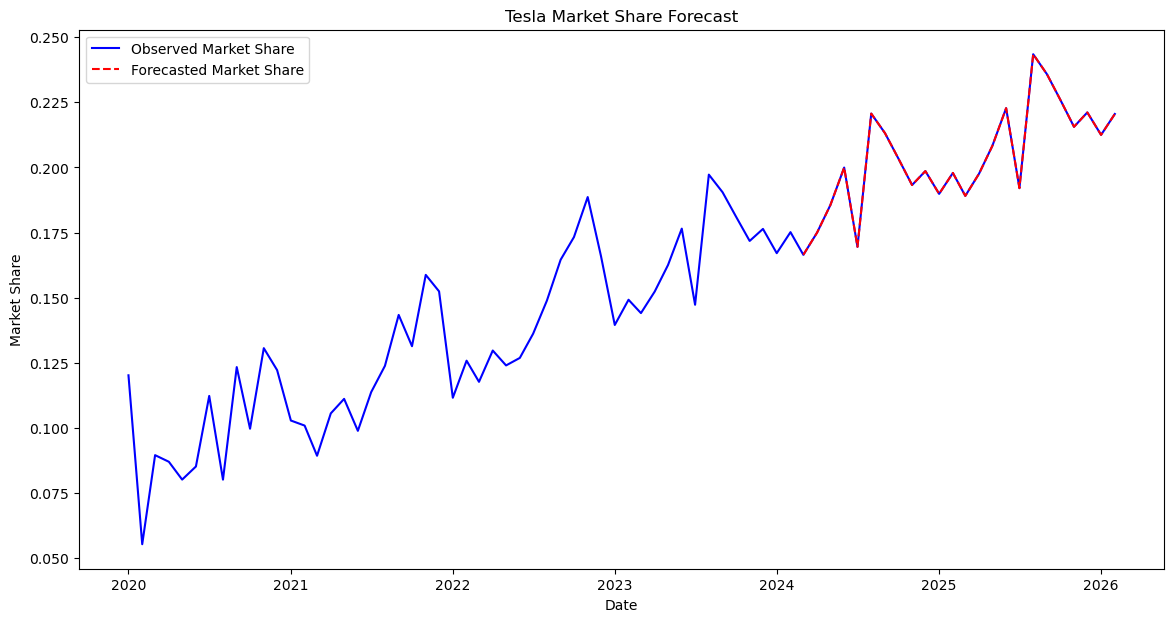

In [63]:
forecast_index = pd.date_range(start=tesla_market_share_ts.index[-1] + pd.offsets.MonthBegin(1), periods=24, freq='MS')
forecast_values = forecast.predicted_mean

# Combine the observed and forecasted values for plotting
combined = pd.concat([tesla_market_share_ts, forecast_values])

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(combined.index, combined, label='Observed Market Share', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Market Share', linestyle='--', color='red')
plt.title('Tesla Market Share Forecast')
plt.xlabel('Date')
plt.ylabel('Market Share')
plt.legend()
plt.show()